In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
dados = pd.read_csv('dados_produtos.csv') #importa base de dados

In [98]:
dados.head()

,product_name,Nota,Qtd_avaliada,Comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [100]:
#criando um dicionario para substituir  o nome de cada coluna
dicionario =  {
    'product_name':'Produto','rating':'Nota',
    'rating_count':'Qtd_avaliada',
    'purchased':'Comprou'
}

In [101]:
dados.rename(columns=dicionario,inplace=True)

In [102]:
dados.head()


,Produto,Nota,Qtd_avaliada,Comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [103]:
# obtendo informações gerais sobre o dataframe
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Produto       100 non-null    object 
 1   Nota          100 non-null    float64
 2   Qtd_avaliada  100 non-null    int64  
 3   Comprou       100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None


In [104]:
#estatisticas descritivas
print(dados.describe())

             Nota  Qtd_avaliada  Comprou
count  100.000000    100.000000   100.00
mean     4.056900   2536.670000     0.55
std      0.588344   1458.312544     0.50
min      3.020000     10.000000     0.00
25%      3.580000   1433.250000     0.00
50%      4.105000   2424.000000     1.00
75%      4.505000   3773.000000     1.00
max      5.000000   4977.000000     1.00


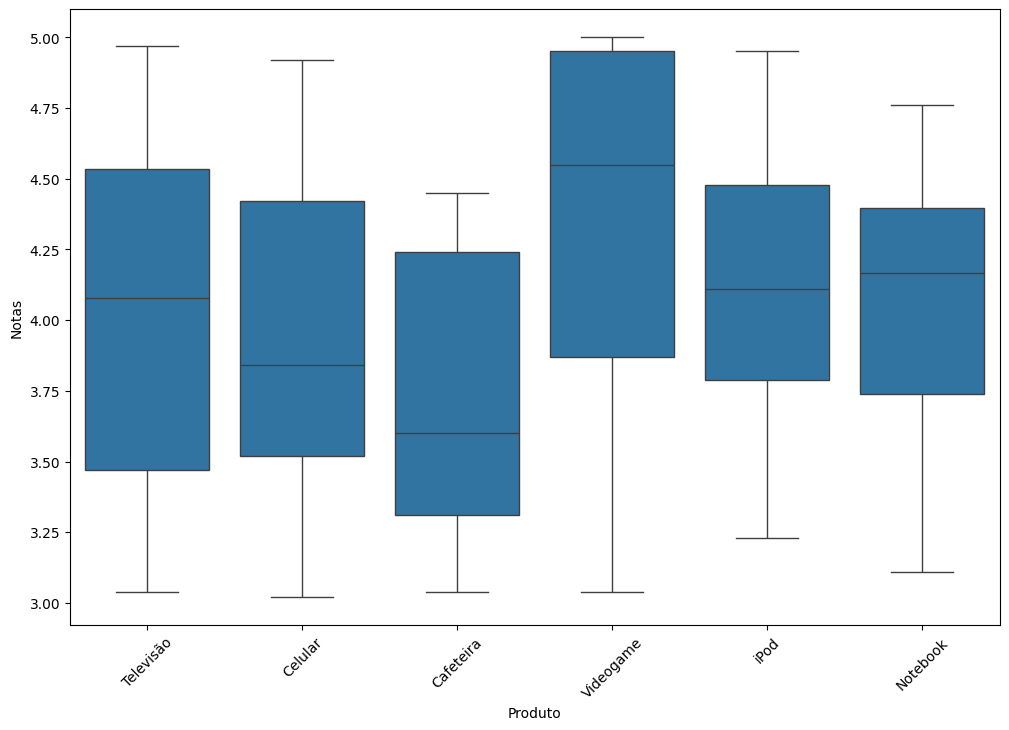

In [105]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Produto', y='Nota', data=dados)
plt.xlabel('Produto')
plt.ylabel('Notas')
plt.xticks(rotation=45) 
plt.show()


In [107]:
# Verificar valores ausentes
print(dados.isnull().sum())


Produto         0
Nota            0
Qtd_avaliada    0
Comprou         0
dtype: int64


In [108]:
#contagem de notas por produto
dados['Produto'].value_counts()

Produto
Celular      21
Televisão    19
iPod         18
Videogame    17
Notebook     16
Cafeteira     9
Name: count, dtype: int64

In [109]:
products = dados['Produto'].unique()


In [110]:
# Aplicando a transformação nos dados
# Biblioteca sklearn model

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from matplotlib.colors import ListedColormap




----------------- Árvore de decisão do produto Televisão ---------

Avaliação do modelo:

Acurácia: 0.5
F1 Score: 0.5
Precisão: 1.0
Recall: 0.3333333333333333
Matriz de Confusão:
[[1 0]
 [2 1]]


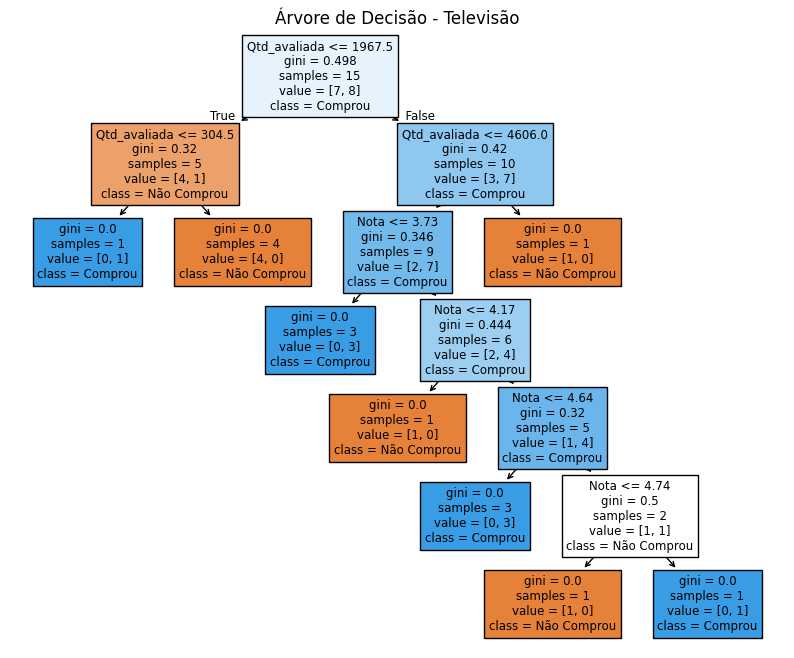


----------------- Árvore de decisão do produto Celular ---------

Avaliação do modelo:

Acurácia: 0.6
F1 Score: 0.6666666666666666
Precisão: 0.5
Recall: 1.0
Matriz de Confusão:
[[1 2]
 [0 2]]


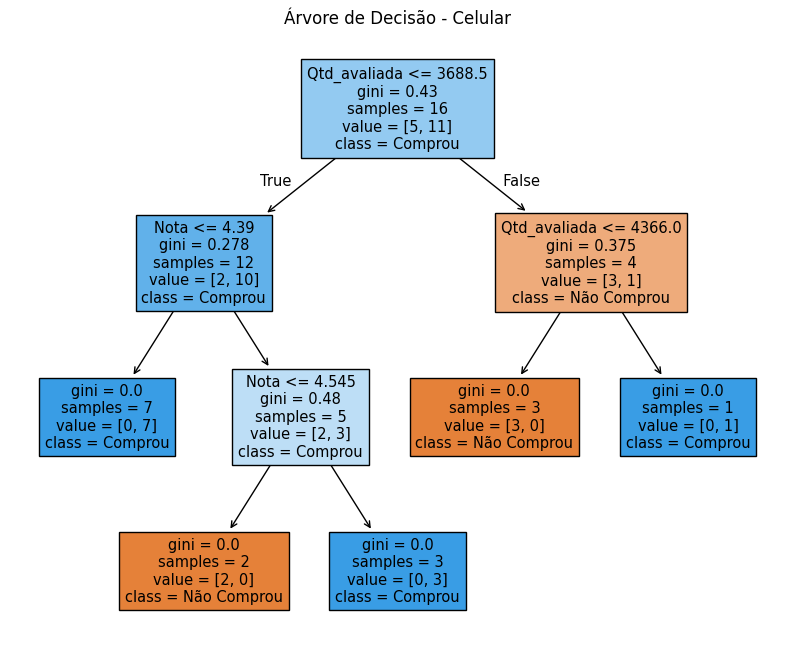


----------------- Árvore de decisão do produto Cafeteira ---------

Avaliação do modelo:

Acurácia: 0.5
F1 Score: 0.0
Precisão: 0.0
Recall: 0.0
Matriz de Confusão:
[[1 0]
 [1 0]]


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


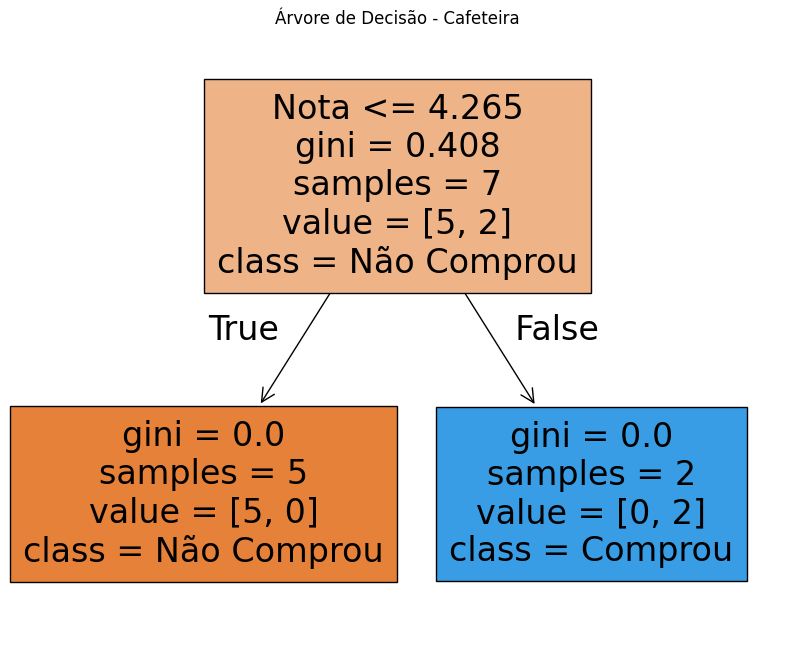


----------------- Árvore de decisão do produto Videogame ---------

Avaliação do modelo:

Acurácia: 1.0
F1 Score: 1.0
Precisão: 1.0
Recall: 1.0
Matriz de Confusão:
[[4]]


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


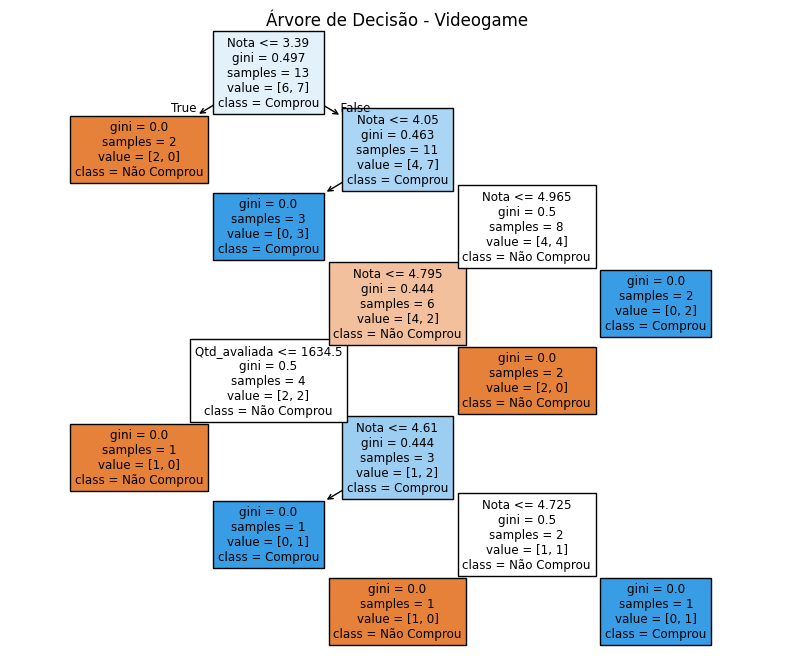


----------------- Árvore de decisão do produto iPod ---------

Avaliação do modelo:

Acurácia: 0.5
F1 Score: 0.5
Precisão: 0.5
Recall: 0.5
Matriz de Confusão:
[[1 1]
 [1 1]]


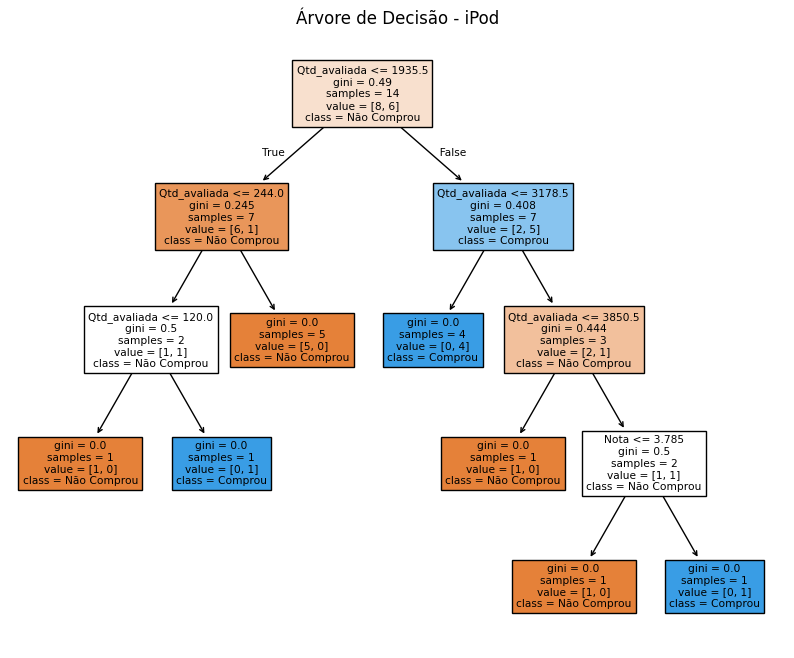


----------------- Árvore de decisão do produto Notebook ---------

Avaliação do modelo:

Acurácia: 0.75
F1 Score: 0.6666666666666666
Precisão: 0.5
Recall: 1.0
Matriz de Confusão:
[[2 1]
 [0 1]]


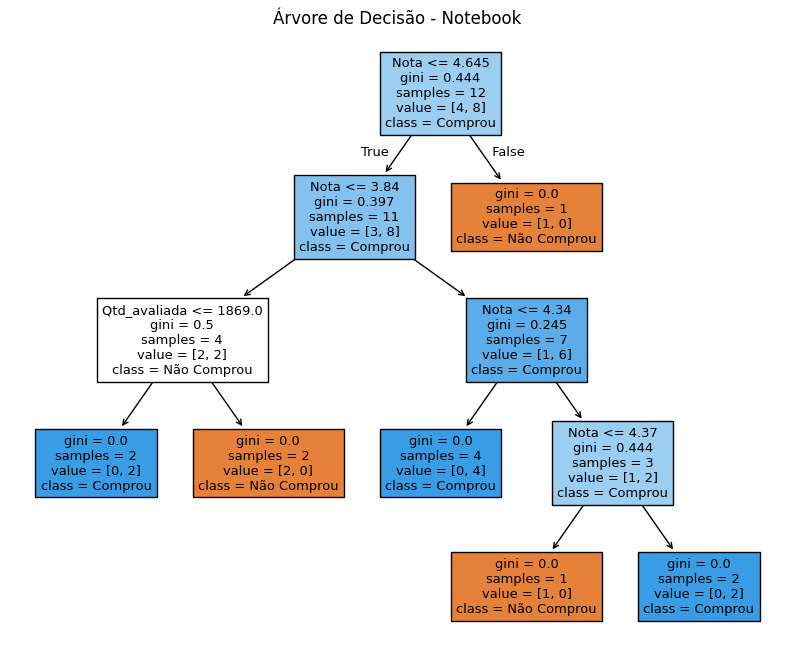

In [111]:

# Loop para criar e avaliar o modelo de árvore de decisão para cada produto
for product in products:
    print(f'\n----------------- Árvore de decisão do produto {product} ---------\n')

    # Filtrar dados para o produto atual
    product_data = dados.loc[dados['Produto'] == product]

    # Definir X e y
    x = product_data.drop(['Comprou', 'Produto'], axis=1)
    y = product_data['Comprou']

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Criar e treinar o modelo de árvore de decisão
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = dtc.predict(x_test)

    # Avaliação do modelo
    print('Avaliação do modelo:\n')
    print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precisão: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'Matriz de Confusão:\n{confusion_matrix(y_test, y_pred)}')

    # Visualização da árvore de decisão
    plt.figure(figsize=(10, 8))
    tree.plot_tree(dtc, feature_names=x.columns, class_names=['Não Comprou', 'Comprou'], filled=True)
    plt.title(f'Árvore de Decisão - {product}')
    plt.show()
